In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

### Load the dataset

In [2]:
df = pd.read_csv("./data/writing_center.csv")
df.head()

,Student_ID,Term,Section_ID,Instructor_ID,Main_CourseID,Gender,Age,Ethnicity,FirstGen,Military,...,International,Nonresident,WR_Center,Main_Course_SuccessFlag,Main_Course_GradePoints,HS_GPA,Online,N_Center_Visits,Center_Attendance_Hours,N_Conf
0,1,Year 1 Fall,112,9569,ENG 1,Male,21,Mixed Ethnicity,0,0,...,0,0,0,1,2,NaN,1,NaN,NaN,NaN
1,2,Year 1 Fall,89,1515,ENG 1,Female,24,Mixed Ethnicity,0,0,...,0,0,1,0,1,NaN,0,17.0,18.351944,1.0
2,3,Year 1 Fall,99,2357,ENG 1,Female,24,Hispanic / Latino,0,0,...,0,0,0,1,4,2.113,0,NaN,NaN,NaN
3,9,Year 1 Fall,102,1672,ENG 1,Male,24,"White, Non-Hispanic",1,0,...,0,0,0,1,3,2.249,0,NaN,NaN,NaN
4,11,Year 1 Fall,102,1672,ENG 1,Male,26,Asian,1,0,...,0,0,0,1,2,3.100,0,NaN,NaN,NaN


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4727 entries, 0 to 4726
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Student_ID                   4727 non-null   int64  
 1   Term                         4727 non-null   object 
 2   Section_ID                   4727 non-null   int64  
 3   Instructor_ID                4727 non-null   int64  
 4   Main_CourseID                4727 non-null   object 
 5   Gender                       4727 non-null   object 
 6   Age                          4727 non-null   int64  
 7   Ethnicity                    4727 non-null   object 
 8   FirstGen                     4727 non-null   int64  
 9   Military                     4727 non-null   int64  
 10  FosterYouth                  4727 non-null   int64  
 11  DSPS                         4727 non-null   int64  
 12  FinAid                       4727 non-null   int64  
 13  Units_Attempted_Be

##### Check [here](https://cran.r-project.org/web/packages/IRexamples/IRexamples.pdf) to get a detailed description on features

#### Deal with missing values and etc.

In [4]:
# fillna(0) for missing values except for HS GPA
df.N_Center_Visits.fillna(0, inplace=True)
df.Center_Attendance_Hours.fillna(0, inplace=True)
df.N_Conf.fillna(0, inplace=True)

# replace GPA_Beg_Of_Term == 0 with NaN when Units_Attempted_Beg_Of_Term != 0
df.loc[df['Units_Attempted_Beg_Of_Term']==0, 'GPA_Beg_Of_Term'] = df.loc[df['Units_Attempted_Beg_Of_Term']==0, 'GPA_Beg_Of_Term'].replace([0], np.nan)

In [5]:
# perform one-hot encodings on Gender and Ethnicity
df_encoded = pd.get_dummies(df, columns=['Gender', 'Ethnicity'], dtype=int)

#### Check the target variable (Main_Course_GradePoints)

count    4727.000000
mean        2.538608
std         1.475337
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Main_Course_GradePoints, dtype: float64


/var/folders/tj/hl1lt9gs7437b5wxt0r22tfc0000gn/T/ipykernel_54379/2994349575.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Main_Course_GradePoints'], color='g', bins=100, hist_kws={'alpha': 0.4})


<Axes: xlabel='Main_Course_GradePoints', ylabel='Density'>

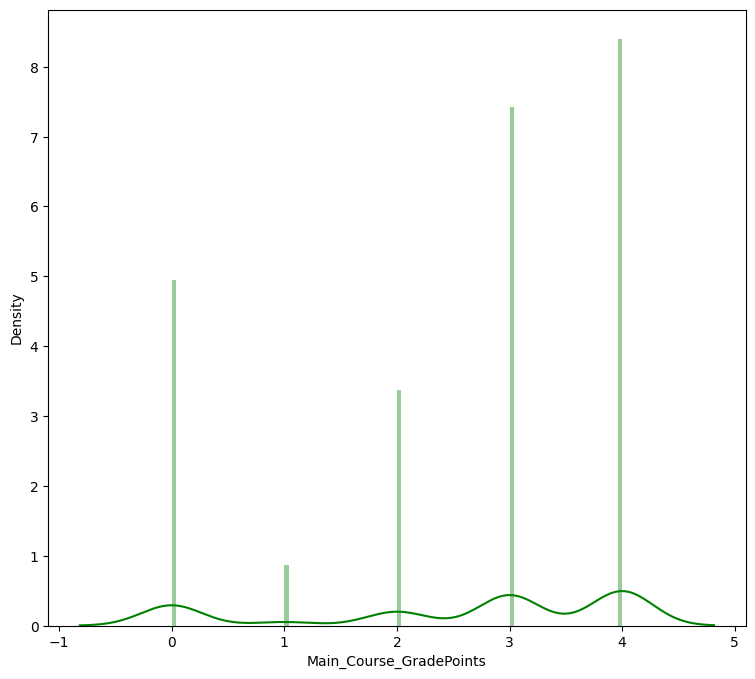

In [6]:
print(df['Main_Course_GradePoints'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Main_Course_GradePoints'], color='g', bins=100, hist_kws={'alpha': 0.4})

#### Categorical data distribution

In [7]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [8]:
df_cat = df.select_dtypes(include = ['O'])
df_cat.head()

,Term,Main_CourseID,Gender,Ethnicity
0,Year 1 Fall,ENG 1,Male,Mixed Ethnicity
1,Year 1 Fall,ENG 1,Female,Mixed Ethnicity
2,Year 1 Fall,ENG 1,Female,Hispanic / Latino
3,Year 1 Fall,ENG 1,Male,"White, Non-Hispanic"
4,Year 1 Fall,ENG 1,Male,Asian


In [9]:
df_cat.Term.value_counts()

Term
Year 2 Fall      1266
Year 1 Fall      1121
Year 3 Spring    1074
Year 2 Spring     878
Year 2 Summer     218
Year 3 Summer     170
Name: count, dtype: int64

In [10]:
df_cat.Gender.value_counts()

Gender
Male       2403
Female     2258
Decline      66
Name: count, dtype: int64

In [11]:
df_cat['Ethnicity'].value_counts()

Ethnicity
White, Non-Hispanic    1501
Asian                  1442
Mixed Ethnicity         972
Hispanic / Latino       605
Decline to State        102
African American         93
Pacific Islander          9
Native American           3
Name: count, dtype: int64

#### Numerical data distribution

In [12]:
df_num = df_encoded.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Student_ID,Section_ID,Instructor_ID,Age,FirstGen,Military,FosterYouth,DSPS,FinAid,Units_Attempted_Beg_Of_Term,...,Gender_Female,Gender_Male,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Decline to State,Ethnicity_Hispanic / Latino,Ethnicity_Mixed Ethnicity,Ethnicity_Native American,Ethnicity_Pacific Islander,"Ethnicity_White, Non-Hispanic"
0,1,112,9569,21,0,0,0,0,1,42.0,...,0,1,0,0,0,0,1,0,0,0
1,2,89,1515,24,0,0,0,0,0,93.5,...,1,0,0,0,0,0,1,0,0,0
2,3,99,2357,24,0,0,0,0,1,42.0,...,1,0,0,0,0,1,0,0,0,0
3,9,102,1672,24,1,0,0,0,0,49.0,...,0,1,0,0,0,0,0,0,0,1
4,11,102,1672,26,1,0,0,0,0,25.0,...,0,1,0,1,0,0,0,0,0,0


array([[<Axes: title={'center': 'Student_ID'}>,
        <Axes: title={'center': 'Section_ID'}>,
        <Axes: title={'center': 'Instructor_ID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'FirstGen'}>,
        <Axes: title={'center': 'Military'}>],
       [<Axes: title={'center': 'FosterYouth'}>,
        <Axes: title={'center': 'DSPS'}>,
        <Axes: title={'center': 'FinAid'}>,
        <Axes: title={'center': 'Units_Attempted_Beg_Of_Term'}>,
        <Axes: title={'center': 'GPA_Beg_Of_Term'}>,
        <Axes: title={'center': 'TermUnitsAttempted'}>],
       [<Axes: title={'center': 'K12_Student'}>,
        <Axes: title={'center': 'First_Time_College_Student'}>,
        <Axes: title={'center': 'Nonresident_Tuition_Exempt'}>,
        <Axes: title={'center': 'International'}>,
        <Axes: title={'center': 'Nonresident'}>,
        <Axes: title={'center': 'WR_Center'}>],
       [<Axes: title={'center': 'Main_Course_SuccessFlag'}>,
        <Axes: title={'

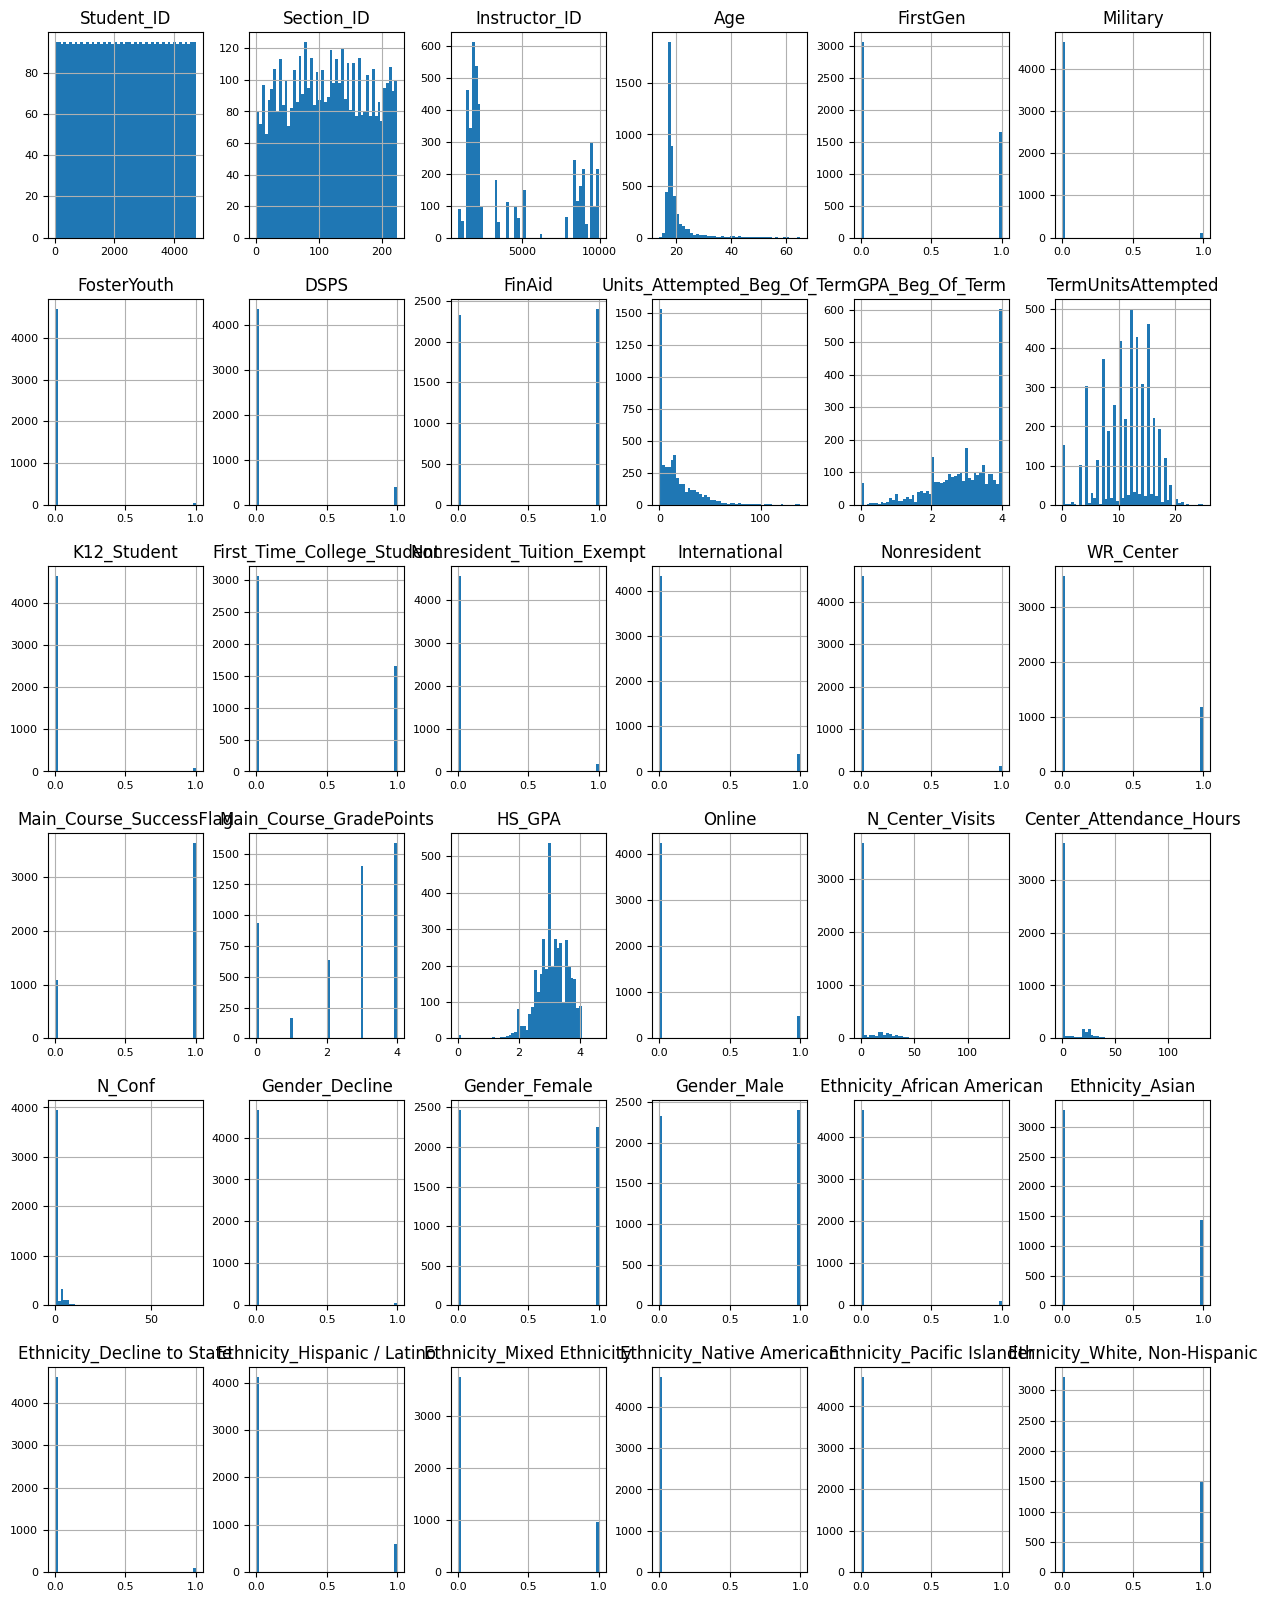

In [13]:
df_num.hist(figsize=(15, 20), bins=50, xlabelsize=8, ylabelsize=8)

#### Check for correlation to the target variable

([0, 1], [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

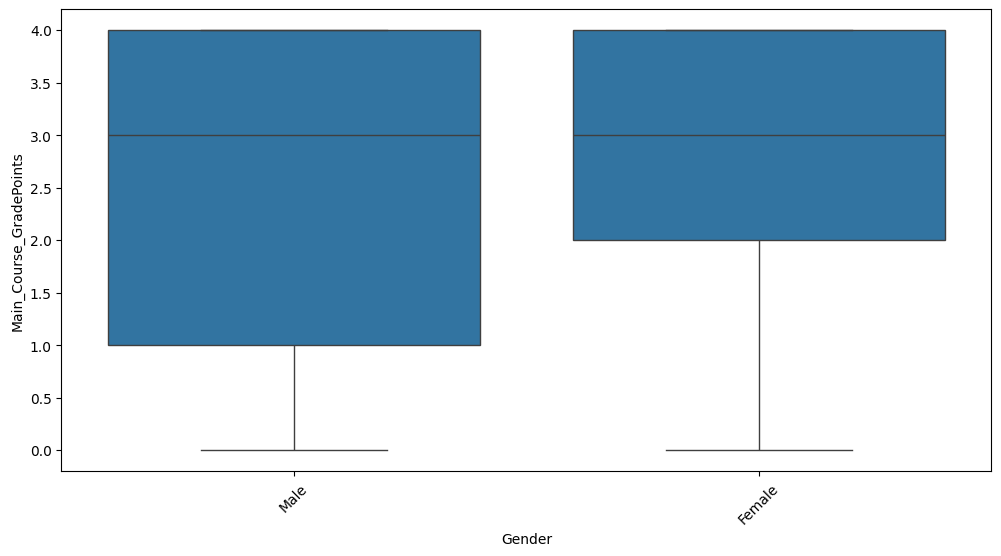

In [14]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Gender', y='Main_Course_GradePoints', data=df[df["Gender"]!="Decline"])
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Mixed Ethnicity'),
  Text(1, 0, 'White, Non-Hispanic'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'Hispanic / Latino'),
  Text(4, 0, 'Decline to State'),
  Text(5, 0, 'African American'),
  Text(6, 0, 'Pacific Islander'),
  Text(7, 0, 'Native American')])

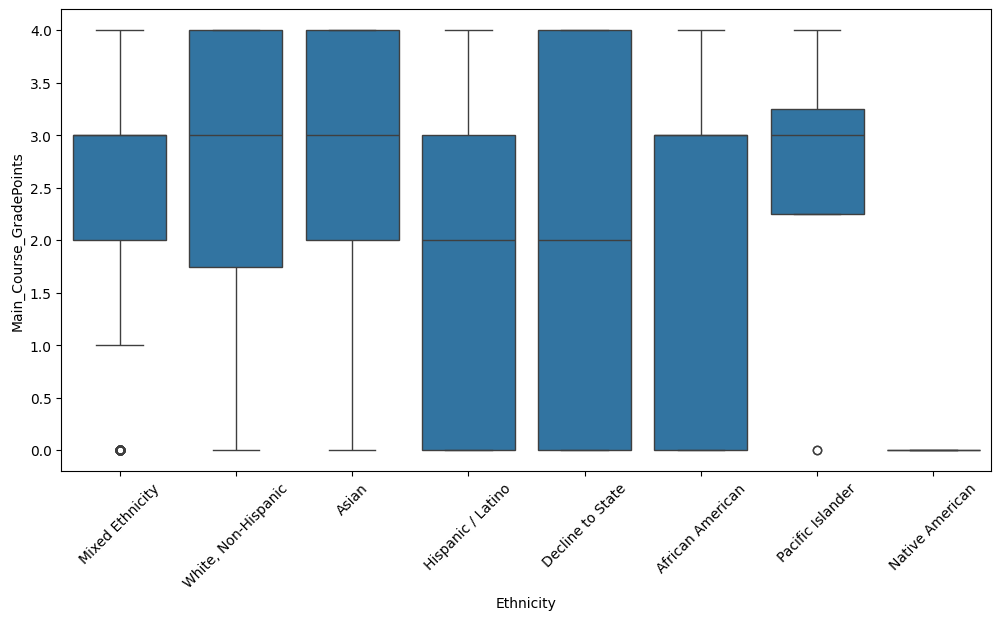

In [15]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Ethnicity', y='Main_Course_GradePoints', data=df[df["Gender"]=="Male"])
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Mixed Ethnicity'),
  Text(1, 0, 'Hispanic / Latino'),
  Text(2, 0, 'White, Non-Hispanic'),
  Text(3, 0, 'Asian'),
  Text(4, 0, 'African American'),
  Text(5, 0, 'Decline to State'),
  Text(6, 0, 'Native American'),
  Text(7, 0, 'Pacific Islander')])

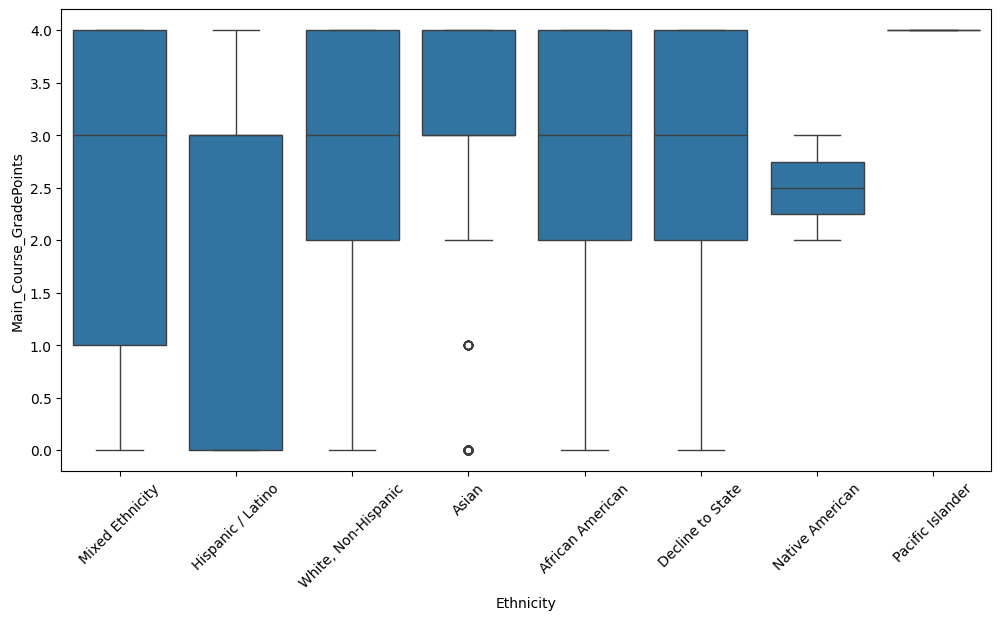

In [16]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Ethnicity', y='Main_Course_GradePoints', data=df[df["Gender"]=="Female"])
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [17]:
df_num_corr = df_num.corr()['Main_Course_GradePoints'] 
golden_features_list_1 = df_num_corr[(abs(df_num_corr) > 0.1)&(abs(df_num_corr) < 0.8)].sort_values(ascending=False) # set (< 0.8) to exclude Main_Course_GradePoints and Main_Course_SuccessFlag 
print("There is {} strongly correlated values with Main_Course_GradePoints:\n{}".format(len(golden_features_list_1), golden_features_list_1))

There is 7 strongly correlated values with Main_Course_GradePoints:
GPA_Beg_Of_Term                0.469882
TermUnitsAttempted             0.429069
HS_GPA                         0.338443
Center_Attendance_Hours        0.129726
Ethnicity_Asian                0.129047
N_Center_Visits                0.115690
Ethnicity_Hispanic / Latino   -0.139449
Name: Main_Course_GradePoints, dtype: float64


In [18]:
df_num_corr = df_num.corr()['Main_Course_SuccessFlag'] 
golden_features_list_2 = df_num_corr[(abs(df_num_corr) > 0.1)&(abs(df_num_corr) < 0.8)].sort_values(ascending=False) # set (< 0.8) to exclude Main_Course_GradePoints and Main_Course_SuccessFlag 
print("There is {} strongly correlated values with Main_Course_SuccessFlag:\n{}".format(len(golden_features_list_2), golden_features_list_2))

There is 7 strongly correlated values with Main_Course_SuccessFlag:
TermUnitsAttempted             0.406989
GPA_Beg_Of_Term                0.378359
HS_GPA                         0.261088
Center_Attendance_Hours        0.130807
N_Center_Visits                0.123939
Ethnicity_Asian                0.104872
Ethnicity_Hispanic / Latino   -0.114641
Name: Main_Course_SuccessFlag, dtype: float64


#### Check for correlation between feature variables

<Axes: >

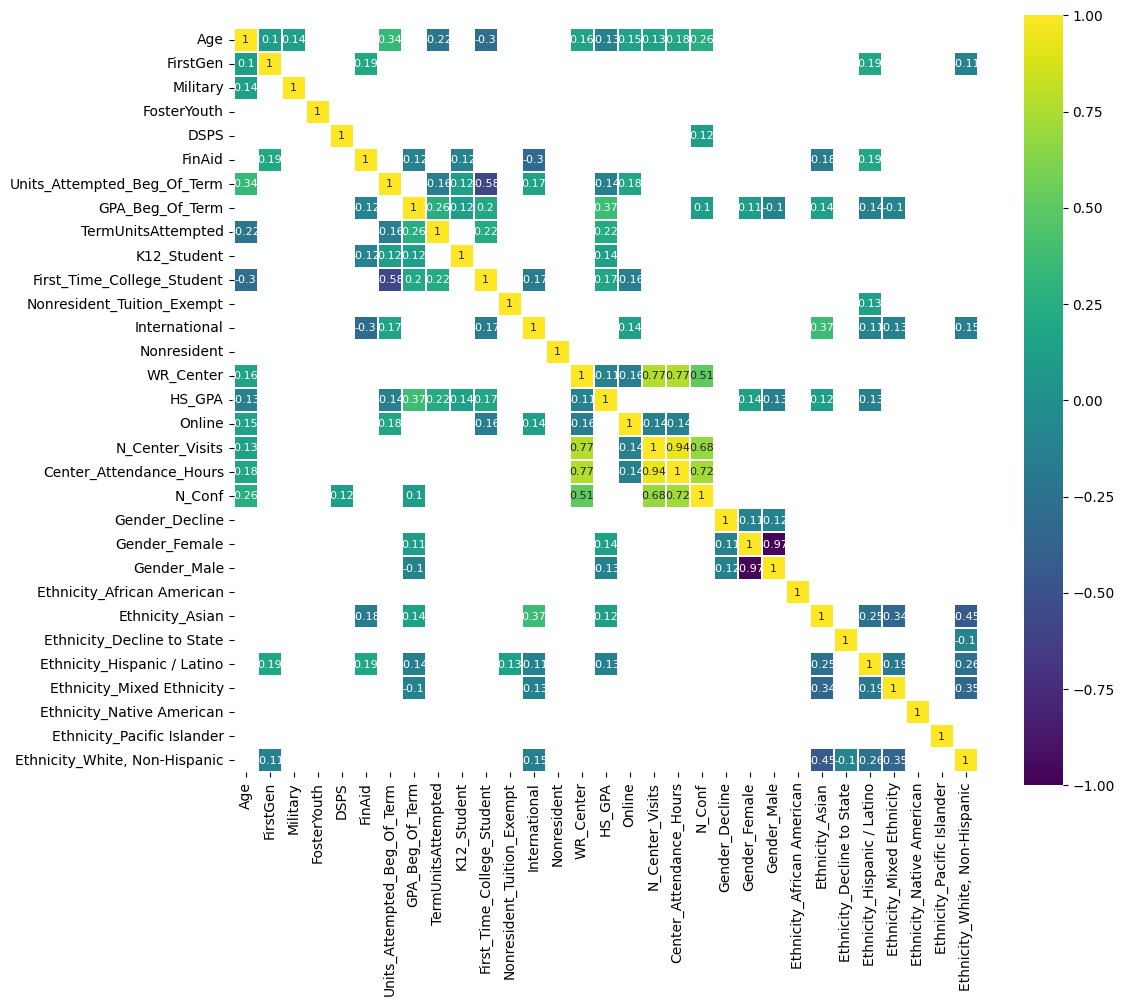

In [19]:
corr = df_num.drop(["Student_ID", "Section_ID", "Instructor_ID", 'Main_Course_GradePoints', 'Main_Course_SuccessFlag'], axis=1).corr() # We already examined Main_Course_GradePoints correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)